In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import make_blobs

In [150]:
X,Y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)


<Figure size 432x288 with 0 Axes>

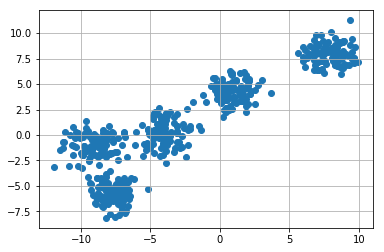

<Figure size 432x288 with 0 Axes>

In [151]:
plt.grid()
plt.scatter(X[:,0],X[:,1])
plt.figure(0)


In [184]:
k=5
color=["green","red","blue","yellow","orange"]
clusters={}
for i in range(k):
    random_centre=np.random.random((X.shape[1],))*5
    points=[]
    cluster={'centre':random_centre,
             'points':points,
             'color':color[i]
            }
    clusters[i]=cluster

    

In [185]:
def distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [186]:
def pointassignment(clusters):
    for i in range(X.shape[0]):
        dist=[]
        point=X[i]
        for j in range(k):
            center=clusters[j]['centre']
            d=distance(center,point)
            dist.append(d)
        c=np.argmin(dist)
        clusters[c]['points'].append(point)


In [187]:
def plotclusters(clusters):
    for i in range(k):
        pts=np.array(clusters[i]['points'])
        print(pts.shape)
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[i]['color'])
        except:
            pass
        center=clusters[i]['centre']
        plt.scatter(center[0],center[1],color='black')
    

In [188]:
pointassignment(clusters)

(61, 2)
(302, 2)
(0,)
(5, 2)
(132, 2)


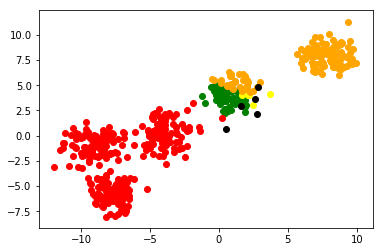

In [189]:
plotclusters(clusters)

In [190]:
def updatecentre(clusters):
    for i in range(k):
        pts=np.array(clusters[i]['points'])
        if(pts.shape[0]>0):
            u=np.mean(pts,axis=0)
            clusters[i]['centre']=u
            clusters[i]['points']=[]

In [191]:
for i in range(50):
    updatecentre(clusters)
    pointassignment(clusters)

(105, 2)
(195, 2)
(54, 2)
(46, 2)
(100, 2)


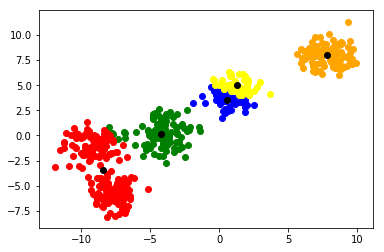

In [192]:
plotclusters(clusters)

In [196]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

In [213]:
X,Y=make_moons(n_samples=200,noise=0.1)

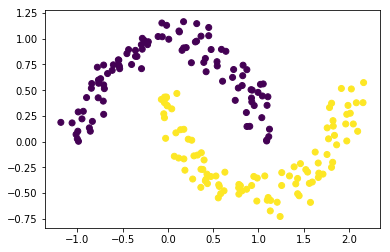

In [214]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [215]:
km=KMeans(n_clusters=2)

In [216]:
km.fit(X,Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

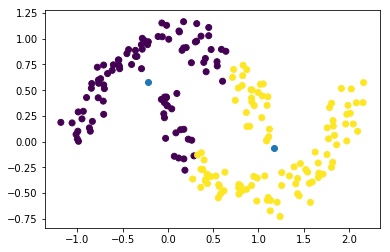

In [218]:
centres=km.cluster_centers_
labels=km.labels_
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centres[:,0],centres[:,1])

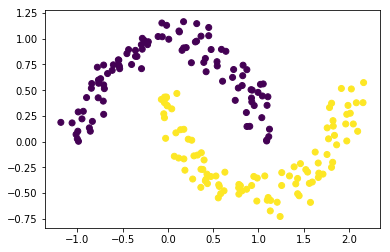

In [219]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [220]:
from sklearn.cluster import DBSCAN

In [276]:
dbs=DBSCAN(eps=0.2,min_samples=7)

In [277]:
pred=dbs.fit_predict(X)

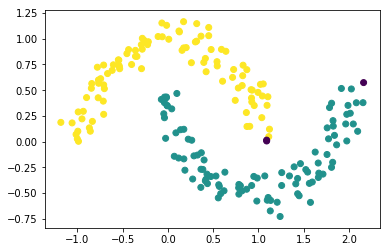

In [278]:
plt.scatter(X[:,0],X[:,1],c=pred)